In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel(r"C:\Users\Youssef\Desktop\loan_data.xlsx")



# Explore Data

In [3]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133,360.0,0.0,Semiurban,N


In [5]:
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480.0,1.0,Semiurban,Y
280,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138,360.0,1.0,Rural,Y
87,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88,360.0,1.0,Urban,Y
339,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66,360.0,1.0,Rural,N
227,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95,300.0,NaN,Urban,Y
37,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100,360.0,1.0,Semiurban,Y
228,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141,360.0,1.0,Rural,Y
301,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113,180.0,0.0,Rural,N
141,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104,360.0,1.0,Semiurban,Y
133,LP001726,Male,Yes,0,Graduate,No,3727,1775.0,131,360.0,1.0,Semiurban,Y


In [6]:
data.shape


(381, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [9]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

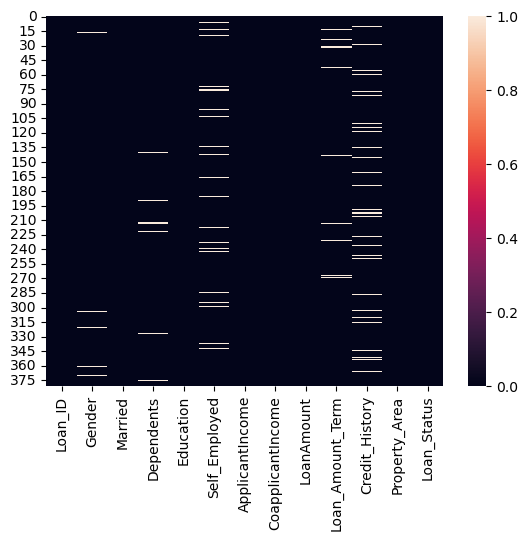

In [10]:
sns.heatmap(data.isnull())

In [11]:
data=data.dropna()

<Axes: >

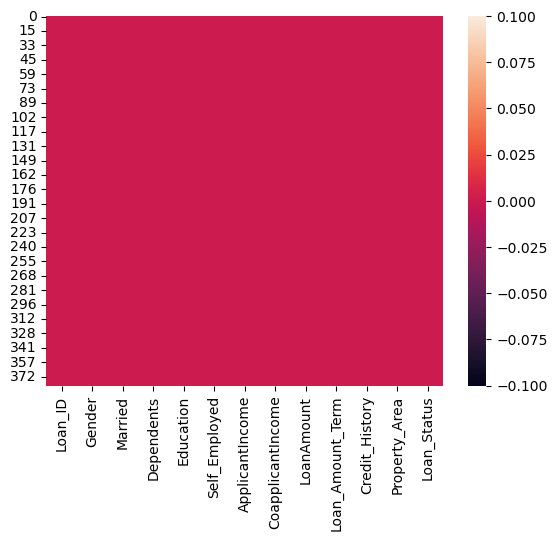

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.Dependents.value_counts()

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [14]:
data.replace(to_replace='3+',value=4,inplace=True)

C:\Users\Youssef\AppData\Local\Temp\ipykernel_16880\2968305740.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace='3+',value=4,inplace=True)


In [15]:
data.Dependents.value_counts()

Dependents
0    194
2     47
1     43
4     24
Name: count, dtype: int64

# Visualization Analysis


C:\Users\Youssef\AppData\Local\Temp\ipykernel_16880\3915868561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette={'Male':'b','Female':'r'})


<Axes: xlabel='Gender', ylabel='count'>

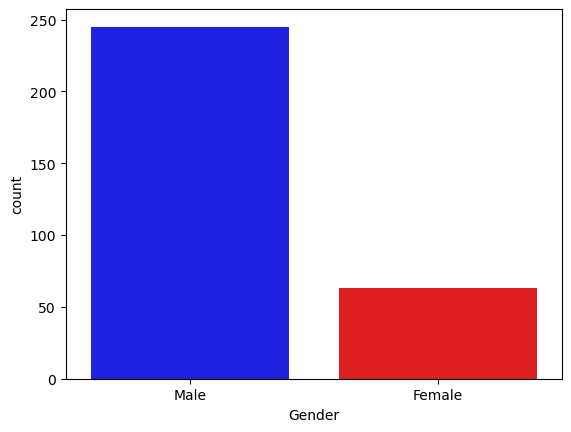

In [16]:
sns.countplot(data=data, x='Gender', palette={'Male':'b','Female':'r'})


Text(0.5, 1.0, 'Loan_Status VS Education')

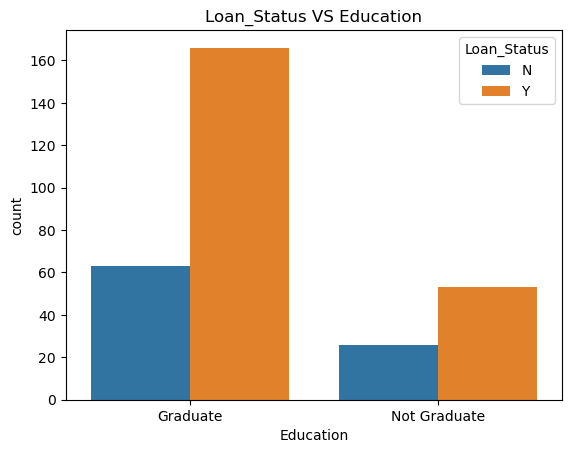

In [17]:
sns.countplot(data=data, x='Education',hue='Loan_Status')
plt.title('Loan_Status VS Education')

# Transform data

In [18]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0}).astype(int)
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).astype(int)
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0}).astype(int)
data['Property_Area'] = data['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0}).astype(int)
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0}).astype(int)



C:\Users\Youssef\AppData\Local\Temp\ipykernel_16880\2232215577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
C:\Users\Youssef\AppData\Local\Temp\ipykernel_16880\2232215577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Youssef\AppData\Local\Temp\ipykernel_16880\2232215577.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed i

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    int64  
 2   Married            308 non-null    int64  
 3   Dependents         308 non-null    int64  
 4   Education          308 non-null    int64  
 5   Self_Employed      308 non-null    int64  
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    int64  
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    int64  
 12  Loan_Status        308 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 33.7+ KB


In [54]:
x = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']


## CREATE MODEL

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40,shuffle=True)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [57]:
model = SVC()


In [58]:
model.fit(x_train, y_train)

SVC()

In [59]:
pre = model.predict(x_test)

print(accuracy_score(y_test, pre))


0.8548387096774194


In [60]:

new_client = [[1, 1, 0, 0, 0, 5000, 2000, 120, 360, 1, 2]]

new_client_scaled = scaler.transform(new_client)

prediction = model.predict(new_client_scaled)

print(" Loan Approved" if prediction[0] == 1 else " Loan Not Approved")


 Loan Approved


C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
new_client = [[0, 0, 3, 1, 1, 1500, 0, 200, 360, 0, 0]]

new_client = pd.DataFrame(new_client, columns=x.columns)

new_client_scaled = scaler.transform(new_client)

prediction = model.predict(new_client_scaled)

print(" Loan Approved" if prediction[0] == 1 else " Loan Not Approved")


 Loan Not Approved


# Simple_Data

In [67]:
data.head(30)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95,360.0,1.0,2,1
5,LP001024,1,1,2,1,0,3200,700.0,70,360.0,1.0,2,1
7,LP001029,1,0,0,1,0,1853,2840.0,114,360.0,1.0,0,0
8,LP001030,1,1,2,1,0,1299,1086.0,17,120.0,1.0,2,1
9,LP001032,1,0,0,1,0,4950,0.0,125,360.0,1.0,2,1
11,LP001036,0,0,0,1,0,3510,0.0,76,360.0,0.0,2,0


In [71]:
data.tail(20)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,LP002840,0,0,0,1,0,2378,0.0,9,360.0,1.0,2,0
358,LP002841,1,1,0,1,0,3166,2064.0,104,360.0,0.0,2,0
359,LP002863,1,1,4,1,0,6406,0.0,150,360.0,1.0,1,0
360,LP002868,1,1,2,1,0,3159,461.0,108,84.0,1.0,2,1
362,LP002874,1,0,0,1,0,3229,2739.0,110,360.0,1.0,2,1
363,LP002877,1,1,1,1,0,1782,2232.0,107,360.0,1.0,0,1
364,LP002893,1,0,0,1,0,1836,33837.0,90,360.0,1.0,2,0
365,LP002894,0,1,0,1,0,3166,0.0,36,360.0,1.0,1,1
367,LP002911,1,1,1,1,0,2787,1917.0,146,360.0,0.0,0,0
368,LP002916,1,1,0,1,0,2297,1522.0,104,360.0,1.0,2,1
